In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv('train_all_features.csv') # train data
test_data = pd.read_csv("test_all_features.csv") # test data
train_label = pd.read_csv("../trainLabels.csv") # train labels
test_label = pd.read_csv("../testLabels.csv") # test labels

test_label

,Id,Class
0,0YRDpBU67WrqEugkXlnd,1
1,0ZHV6acpJ9KkAWPjEI71,1
2,0ZiQmgtxzHe9v5O8Lf2k,1
3,0ZTEyLXaWReMK3rYVCjv,1
4,12TEseaJ4jnbyORqKxhf,1
...,...,...
58,19hXQ2ODt6WvpEdxTGmo,9
59,1EDNRfXhHWl7txAOdycU,9
60,1hcfvnSGMXEHU94egR3F,9
61,1HFt83wrBnSQu7cP2WZy,9


In [4]:
# From this cell to a few below cells, I'm going to manipulate the data into numpy that can be fitted to XGBoost.
train_data_with_labels = pd.merge(train_data, train_label, on="Id")
test_data_with_labels = pd.merge(test_data, test_label, on="Id")

test_data_with_labels

,Id,createmutexa,getconsolecp,resetevent,getconsoleoutputcp,sleep,selectobject,olelockrunning,getwindowtexta,olegetautoconvert,...,cmc,sti,jecxz,jbe,push,div,dec,shl,cmp,Class
0,1EDNRfXhHWl7txAOdycU,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,4,45,9
1,2xlhAE5LO8RFfczB6ep3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,1R0pmNFb5znDi6aTVeZt,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0icJrNnmPvDqVQkC3we1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,8,3
4,0IMUKlZs1Sm8LpGRkWhT,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0gxJ1YmwFUvnOzoM8N53,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,13,127,2
59,2UBy1ZDIiOxJHNnX35Mf,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7
60,4WaGm3PhidQVRopgXz7J,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,8,4
61,0hZqVRKkw7GfMdpalLiN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,3


In [5]:
train_complete_numpy = train_data_with_labels.to_numpy().T
test_complete_numpy = test_data_with_labels.to_numpy().T

test_complete_numpy

array([['1EDNRfXhHWl7txAOdycU', '2xlhAE5LO8RFfczB6ep3',
        '1R0pmNFb5znDi6aTVeZt', ..., '4WaGm3PhidQVRopgXz7J',
        '0hZqVRKkw7GfMdpalLiN', '0XrH26wcU1ASsvK5ZqhD'],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 1, 0, 0],
       [45, 0, 0, ..., 8, 9, 118],
       [9, 7, 6, ..., 4, 3, 8]], dtype=object)

In [6]:
train_data = train_complete_numpy[1:-1].T
train_label = train_complete_numpy[-1] - 1 # since XGBoost take labels as 0 ~ num_class -1, have to subtract 1
test_data = test_complete_numpy[1:-1].T
test_label = test_complete_numpy[-1] - 1

test_data

array([[0, 0, 0, ..., 0, 4, 45],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 8],
       [1, 0, 0, ..., 0, 0, 9],
       [0, 0, 1, ..., 0, 0, 118]], dtype=object)

In [7]:
train = xgb.DMatrix(train_data, label = train_label)
test = xgb.DMatrix(test_data, label = test_label)

In [8]:
param = {'max_depth': 4, 'eta':0.3, 'objective':'multi:softmax','num_class':9 }
epochs = 10

In [9]:
model = xgb.train(param, train, epochs) # model training

In [10]:
prediction = model.predict(test)

In [11]:
print(prediction)
print(test_label)

[8. 6. 5. 2. 2. 3. 0. 5. 1. 2. 4. 3. 6. 0. 1. 7. 6. 8. 4. 1. 0. 1. 3. 2.
 0. 6. 2. 3. 4. 0. 5. 7. 8. 4. 5. 4. 5. 4. 7. 3. 8. 0. 3. 5. 4. 2. 0. 5.
 8. 7. 1. 7. 8. 1. 8. 6. 6. 7. 1. 6. 3. 2. 7.]
[8 6 5 2 2 3 0 5 1 2 4 3 6 0 1 7 6 8 4 1 0 1 3 2 0 6 2 3 4 0 5 7 8 4 5 4 5
 4 7 3 8 0 3 5 5 2 0 4 8 7 1 7 8 1 8 6 6 7 1 6 3 2 7]


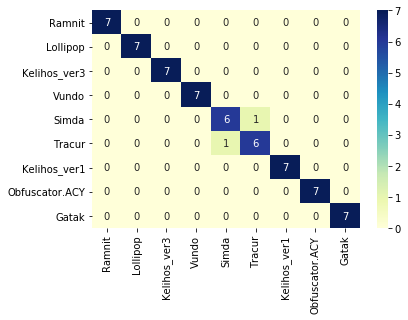

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
c = confusion_matrix(test_label.astype(np.int8), prediction)

classes = ["Ramnit",
"Lollipop",
"Kelihos_ver3",
"Vundo",
"Simda",
"Tracur",
"Kelihos_ver1",
"Obfuscator.ACY",
"Gatak"]

df_cm = pd.DataFrame(c, index = classes, columns = classes)
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label.astype(np.int8), prediction)

0.9682539682539683

In [19]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision = (tp*1.0/tp_fp)
recall = (tp*1.0/tp_fn)

In [24]:
pd.DataFrame([precision, recall],
                         columns = ["Ramnit", "Lollipop", "Kelihos_ver3", "Vundo", "Simda", "Tracur", "Kelihos_ver1", "Obfuscator.ACY", "Gatak"],
                         index = ['Precision', 'Recall'] )

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,1.0,1.0,1.0,1.0,0.857143,0.857143,1.0,1.0,1.0
Recall,1.0,1.0,1.0,1.0,0.857143,0.857143,1.0,1.0,1.0
